<a href="https://colab.research.google.com/github/NizarArdansyah/Capstone-Project-Machine-Learning/blob/main/Kmeans%20plants%20recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisasi
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import csv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Informasi Dataset

In [ ]:
df = pd.read_csv('Crop_recommendation.csv')

df.head()
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

<AxesSubplot:xlabel='humidity', ylabel='count'>

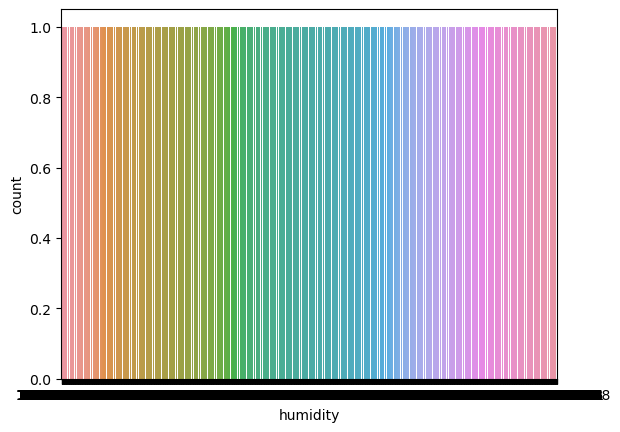

In [ ]:
sns.countplot(x=df['humidity'])

Eksplorasi data menentukan korelasi terbaik

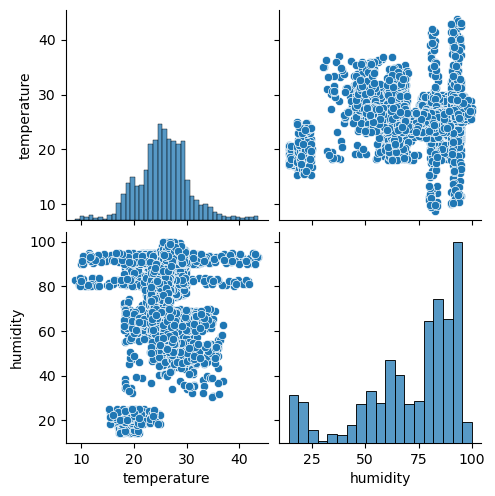

In [ ]:
sns.pairplot(df[[ 'temperature', 'humidity']])

C:\Users\zar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


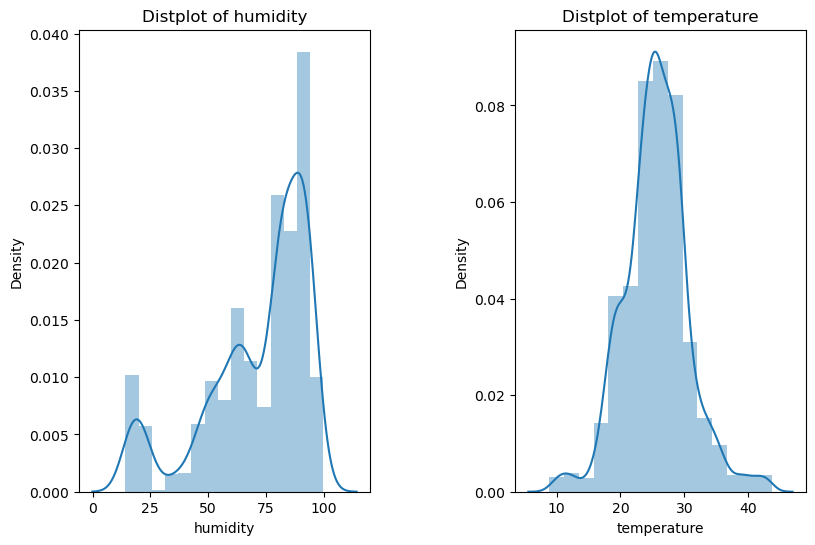

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['humidity' , 'temperature' ]:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

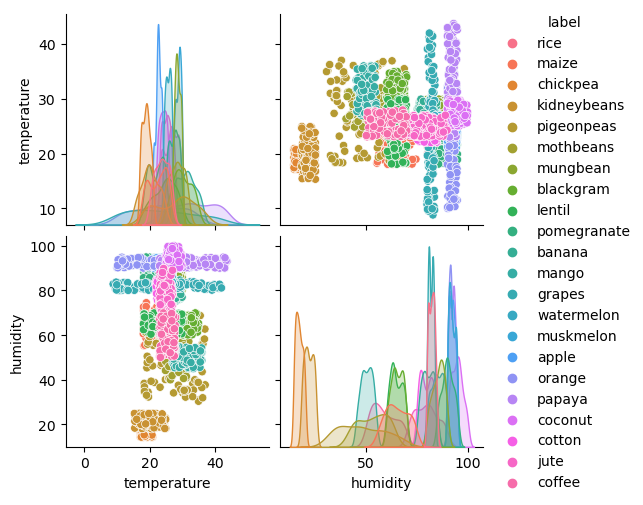

In [ ]:
sns.pairplot(df, vars = ['temperature', 'humidity'], hue = "label")

In [ ]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


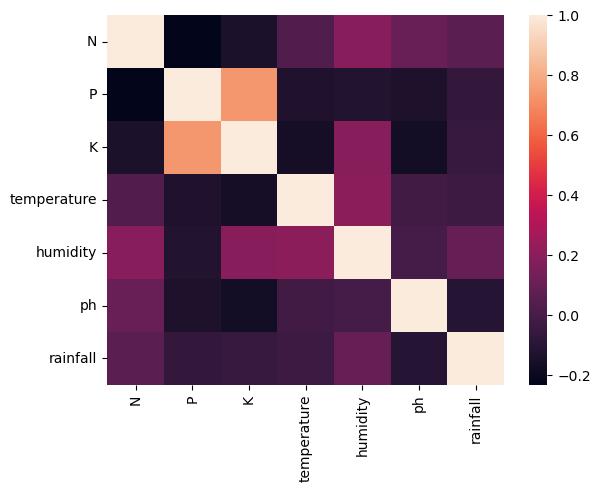

In [ ]:
sns.heatmap(df.corr());

Normalisasi data

In [ ]:
data_array =[]

# Baca file CSV dan masukkan data ke dalam array
with open('Crop_recommendation.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header baris pertama jika ada
    for row in reader:
        data_array.append(row[:6])

# Konversi array menjadi numpy array untuk kemudahan pengolahan data
data_array = np.array(data_array)

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data tanaman
data_tanaman_normal = scaler.fit_transform(data_array)

print("Data Tanaman:")
print(data_array)
print("\nData Tanaman Setelah Normalisasi:")
print(data_tanaman_normal)
print("=======================")
print(data_tanaman_normal[:10])
print(data_tanaman_normal.shape)
print(data_array.shape)


Data Tanaman:
[['90' '42' '43' '20.87974371' '82.00274423' '6.502985292000001']
 ['85' '58' '41' '21.77046169' '80.31964408' '7.038096361']
 ['60' '55' '44' '23.00445915' '82.3207629' '7.840207144']
 ...
 ['118' '33' '30' '24.13179691' '67.22512329' '6.362607851']
 ['117' '32' '34' '26.2724184' '52.12739421' '6.758792552']
 ['104' '18' '30' '23.60301571' '60.39647474' '6.779832611000002']]

Data Tanaman Setelah Normalisasi:
[[0.64285714 0.26428571 0.19       0.34588614 0.79026683 0.46626364]
 [0.60714286 0.37857143 0.18       0.37144489 0.77063285 0.54948026]
 [0.42857143 0.35714286 0.195      0.4068539  0.79397664 0.67421877]
 ...
 [0.84285714 0.2        0.125      0.43920235 0.61788046 0.44443315]
 [0.83571429 0.19285714 0.145      0.50062653 0.44175991 0.50604494]
 [0.74285714 0.09285714 0.125      0.42402921 0.53822177 0.50931694]]
[[0.64285714 0.26428571 0.19       0.34588614 0.79026683 0.46626364]
 [0.60714286 0.37857143 0.18       0.37144489 0.77063285 0.54948026]
 [0.42857143 0

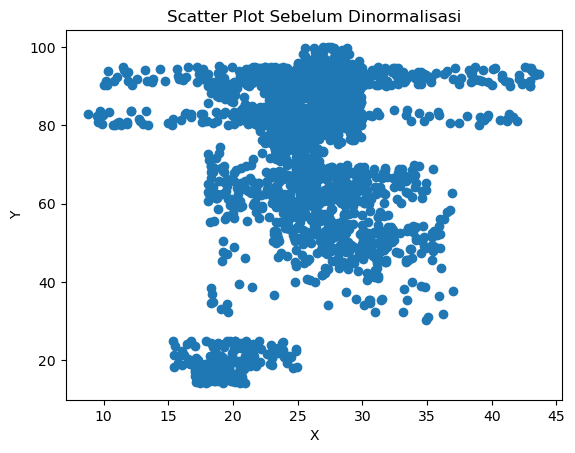

In [ ]:
# Mendapatkan kolom temperature sebagai data x
x = df[[ 'temperature']]

# Mendapatkan kolom humidity sebagai data y
y = df[[ 'humidity']]

# Membuat scatter plot
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot Sebelum Dinormalisasi')

# Menampilkan plot
plt.show()


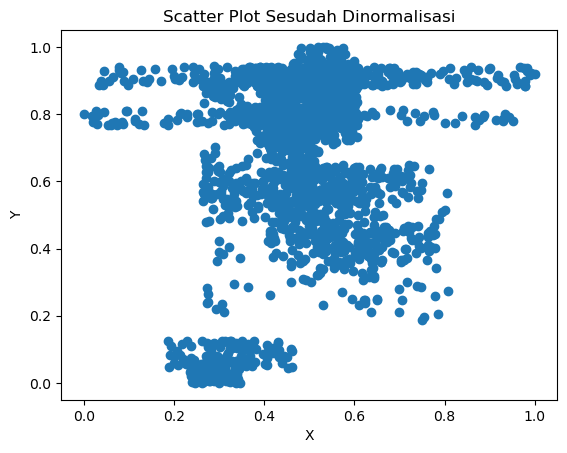

[0.34588614 0.37144489 0.4068539  ... 0.43920235 0.50062653 0.42402921]
[0.79026683 0.77063285 0.79397664 ... 0.61788046 0.44175991 0.53822177]


In [ ]:
# Mendapatkan kolom keempat (temperature) sebagai data x
x = data_tanaman_normal[:, 3]

# Mendapatkan kolom kelima (humidity) sebagai data y
y = data_tanaman_normal[:, 4]

# Membuat scatter plot
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot Sesudah Dinormalisasi')

# Menampilkan plot
plt.show()

print(x)
print(y)

Menentukan Jumlah Cluster dengan metode silhouette_scores

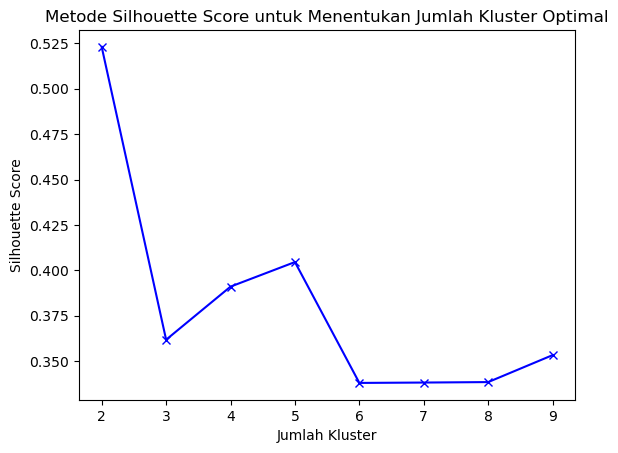

In [ ]:
# Menentukan jumlah cluster menggunakan elbow method 

# Menyimpan skor siluet untuk setiap jumlah kluster
silhouette_scores = []

# K range untuk percobaan jumlah kluster
k_range = range(2, 10)

# Melakukan klasterisasi dan menghitung skor siluet untuk setiap jumlah kluster
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_tanaman_normal)
    labels = kmeans.labels_
    score = silhouette_score(data_tanaman_normal, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Silhouette Score')
plt.title('Metode Silhouette Score untuk Menentukan Jumlah Kluster Optimal')
plt.show()


Menentukan Jumlah Cluster dengan metode Elbow

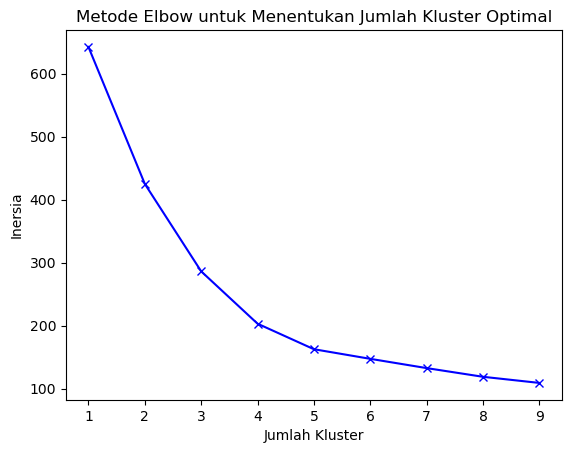

In [ ]:

# Menyimpan nilai inersia untuk setiap jumlah kluster
inertia = []

# K range untuk percobaan jumlah kluster
k_range = range(1, 10)

# Melakukan klasterisasi untuk setiap jumlah kluster
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_tanaman_normal)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.show()


Membuat model K-Means

In [ ]:

# Jumlah kluster yang diinginkan
n_clusters = 4

# Inisialisasi model K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melatih model dengan data tanaman
kmeans.fit(data_tanaman_normal)


# Menggambarkan pusat-pusat kluster
centers = kmeans.cluster_centers_

# Prediksi kluster untuk data tanaman
labels = kmeans.labels_


# Cetak pusat-pusat kluster
print("Pusat-Pusat Kluster:")
print(centers)

# Cetak kluster untuk setiap data tanaman
print("\nKluster untuk Setiap Data Tanaman:")
for i, label in enumerate(labels):
    print(f"Data {i+1}: Kluster {label+1}")

Pusat-Pusat Kluster:
[[0.18649888 0.38652945 0.124301   0.48470349 0.36602204 0.46572695]
 [0.6698306  0.26664338 0.16392421 0.4790466  0.74812698 0.46653726]
 [0.15707143 0.91696429 0.975      0.41362006 0.84977841 0.38459057]
 [0.17528958 0.18195723 0.12144491 0.51059063 0.89412477 0.47670839]]

Kluster untuk Setiap Data Tanaman:
Data 1: Kluster 2
Data 2: Kluster 2
Data 3: Kluster 2
Data 4: Kluster 2
Data 5: Kluster 2
Data 6: Kluster 2
Data 7: Kluster 2
Data 8: Kluster 2
Data 9: Kluster 2
Data 10: Kluster 2
Data 11: Kluster 2
Data 12: Kluster 2
Data 13: Kluster 2
Data 14: Kluster 2
Data 15: Kluster 2
Data 16: Kluster 2
Data 17: Kluster 2
Data 18: Kluster 2
Data 19: Kluster 2
Data 20: Kluster 2
Data 21: Kluster 2
Data 22: Kluster 2
Data 23: Kluster 2
Data 24: Kluster 2
Data 25: Kluster 2
Data 26: Kluster 2
Data 27: Kluster 2
Data 28: Kluster 2
Data 29: Kluster 2
Data 30: Kluster 2
Data 31: Kluster 2
Data 32: Kluster 2
Data 33: Kluster 2
Data 34: Kluster 2
Data 35: Kluster 2
Data 36: K

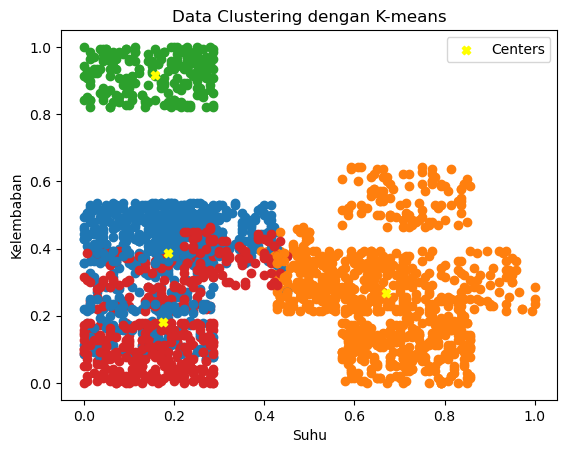

In [ ]:
# Membuat scatter plot untuk setiap kluster
for i in range(len(data_tanaman_normal)):
    plt.scatter(data_tanaman_normal[i, 0], data_tanaman_normal[i, 1], c='C'+str(labels[i]))


# Membuat scatter plot untuk pusat-pusat kluster
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', marker='X', label='Centers')

plt.xlabel('Suhu')
plt.ylabel('Kelembaban')
plt.title('Data Clustering dengan K-means')
plt.legend()
plt.show()